**Общая информация**

**Срок сдачи:** 20 марта 2019, 06:00 <br\>
**Штраф за опоздание:** -1 балл после 06:00 20 марта, -2 балла после 06:00 27 марта, -3 балла после 06:00 3 апреля
-4 балла после 06:00 10 апреля

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий в slack @alkhamush

Необходимо в slack скинуть ссылку в личный чат @alkhamush
Пример ссылки:
https://github.com/stroykova/spheremailru/stroykova_hw1.ipynb 


Используйте данный Ipython Notebook при оформлении домашнего задания.

##### Задание 1 (2 баллов)
Реализовать KNN в классе MyKNeighborsClassifier (обязательное условие: точность не ниже sklearn реализации)
Разберитесь самостоятельно, какая мера расстояния используется в KNeighborsClassifier дефолтно и реализуйте свой алгоритм именно с этой мерой. Самостоятельно разберитесь, как считается score из KNeighborsClassifier и реализуйте аналог в своём классе. Score не должен уступать значению KNN из sklearn

###### Задание 2 (2 балла)
Добиться скорости работы на fit,  predict и predict_proba сравнимой со sklearn для iris и mnist
Для этого используем numpy

###### Задание 3 (2 балла)
Для iris найдите такой параметр n_neighbors, при котором выдаётся наилучший score. Нарисуйте график зависимости score от n_neighbors

###### Задание 4 (3 балла)
Добавить algorithm='kd_tree' в реализацию KNN (использовать KDTree из sklearn.neighbors). Добиться скорости работы на fit,  predict и predict_proba сравнимой со sklearn для iris и mnist
Для этого используем numpy. Score не должен уступать значению KNN из sklearn

###### Задание 5 (1 балла)
Описать для чего нужны следующие библиотеки/классы/функции (список будет ниже)

**Штрафные баллы:**

1. Невыполнение PEP8 -0.5 баллов
2. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw1.ipynb) -0.5 баллов
3. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -0.5 баллов
4. При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять структуру кода и текст. В противном случае -0.5 баллов


In [1]:
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn import datasets
from sklearn.base import ClassifierMixin
from sklearn.datasets import fetch_openml
from sklearn.neighbors.base import NeighborsBase, KNeighborsMixin, SupervisedIntegerMixin 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from scipy.spatial.distance import cdist
from sklearn.neighbors import KDTree
from sklearn.metrics import pairwise_distances_chunked as pdc

#%load_ext pycodestyle_magic

In [2]:
#%%pycodestyle


class MyKNeighborsClassifier(NeighborsBase, KNeighborsMixin,
                             SupervisedIntegerMixin, ClassifierMixin):

    def __init__(self, n_neighbors, algorithm='brute'):
        self.n_neighbors = n_neighbors
        self.algorithm = algorithm

    def fit(self, X, y):
        self.X = np.copy(X)
        self.y = np.copy(y)
        self.y_numb = np.asarray(self.y, dtype = np.uint32) 
        if self.algorithm == 'kd_tree':
            self.X = KDTree(X)
        self.n_classes = len(np.unique(y))

    def reduce_func(self, chunk, start):
        return self.y[np.argpartition(chunk, self.n_neighbors, axis=1)[:,:self.n_neighbors]]

    def predict(self, X):
        if self.algorithm == 'brute':
            classes_array = list(pdc(X, self.X, reduce_func=self.reduce_func))[0]
        if self.algorithm == 'kd_tree':
            classes_array = self.y[self.X.query(X, k=self.n_neighbors, return_distance=False)]
        return np.asarray([np.unique(i)[np.argmax(np.unique(i, return_counts=True)[1])]
                           for i in classes_array])
                 
    def predict_proba(self, X):
        if self.algorithm == 'brute':
            classes_array = list(pdc(X, self.X, reduce_func=self.reduce_func))[0]
        if self.algorithm == 'kd_tree':
            classes_array = self.y_numb[self.X.query(X, k = self.n_neighbors, return_distance=False)]
        res = np.apply_along_axis(np.bincount, 1, np.asarray(classes_array, dtype='int64'),
                                  minlength=self.n_classes)
        return res / np.sum(res, axis = 1).reshape((res.shape[0],1))

    def score(self, X, y):
        return np.count_nonzero(y == self.predict(X)) / y.shape[0]

**IRIS**

In [38]:
iris = datasets.load_iris()

In [45]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target,
                                                    test_size=0.1, stratify=iris.target)

In [5]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='brute')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='brute')

In [6]:
%time clf.fit(X_train, y_train)

CPU times: user 950 µs, sys: 173 µs, total: 1.12 ms
Wall time: 1.32 ms


KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='uniform')

In [7]:
%time my_clf.fit(X_train, y_train)

CPU times: user 234 µs, sys: 43 µs, total: 277 µs
Wall time: 207 µs


In [8]:
%time clf.predict(X_test)

CPU times: user 4.43 ms, sys: 2.67 ms, total: 7.09 ms
Wall time: 34.3 ms


array([0, 2, 0, 0, 2, 0, 2, 2, 2, 1, 1, 1, 1, 1, 0])

In [9]:
%time my_clf.predict(X_test)

CPU times: user 4.23 ms, sys: 0 ns, total: 4.23 ms
Wall time: 4.33 ms


array([0, 2, 0, 0, 2, 0, 2, 2, 2, 1, 1, 1, 1, 1, 0])

In [10]:
%time clf.predict_proba(X_test)

CPU times: user 1.65 ms, sys: 296 µs, total: 1.94 ms
Wall time: 4.43 ms


array([[1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [11]:
%time my_clf.predict_proba(X_test)

CPU times: user 2.03 ms, sys: 41 µs, total: 2.07 ms
Wall time: 1.56 ms


array([[1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [12]:
clf.score(X_test, y_test)

1.0

In [13]:
my_clf.score(X_test, y_test)

1.0

Задание 3

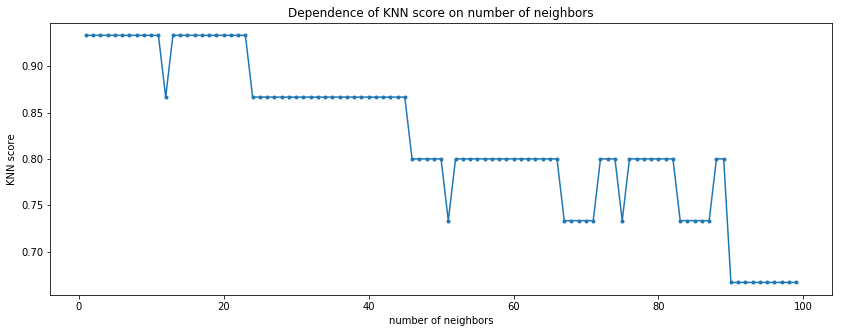

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22]),)

In [46]:
x = np.arange(1, 100)
y = np.empty(99)
for i in x:
    my_clf = MyKNeighborsClassifier(n_neighbors=i, algorithm='brute')
    my_clf.fit(X_train, y_train)
    y[i - 1] = my_clf.score(X_test, y_test)
fig = plt.figure(figsize=(14,5))
ax = plt.subplot(1,1,1)
ax.set_title('Dependence of KNN score on number of neighbors')
ax.set_xlabel('number of neighbors')
ax.set_ylabel('KNN score')
ax.plot(x, y, marker='.')
plt.show()
np.where(y == y.max())

**MNIST**

In [15]:
mnist = fetch_openml('mnist_784', version=1, cache=True)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target,
                                                    test_size=0.01, stratify=mnist.target)

In [17]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='brute')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='brute')

In [18]:
%time my_clf.fit(X_train, y_train)

CPU times: user 157 ms, sys: 228 ms, total: 385 ms
Wall time: 197 ms


In [19]:
%time clf.fit(X_train, y_train)

CPU times: user 277 ms, sys: 0 ns, total: 277 ms
Wall time: 140 ms


KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='uniform')

In [20]:
%time my_clf.predict(X_test)

CPU times: user 3.84 s, sys: 295 ms, total: 4.13 s
Wall time: 2.37 s


array(['5', '4', '2', '1', '3', '4', '9', '1', '3', '2', '1', '3', '7',
       '7', '7', '9', '2', '3', '4', '8', '5', '0', '9', '2', '4', '5',
       '1', '7', '6', '6', '8', '1', '0', '7', '5', '4', '1', '7', '1',
       '2', '3', '9', '6', '5', '8', '0', '7', '7', '6', '5', '2', '2',
       '6', '9', '1', '5', '5', '8', '3', '2', '7', '3', '2', '1', '5',
       '4', '2', '8', '1', '1', '5', '7', '3', '0', '1', '1', '2', '4',
       '0', '0', '5', '6', '1', '0', '3', '6', '8', '3', '4', '6', '5',
       '2', '8', '5', '6', '2', '0', '3', '7', '3', '2', '2', '0', '9',
       '7', '9', '3', '4', '9', '4', '1', '7', '7', '5', '8', '1', '1',
       '1', '1', '1', '9', '0', '7', '9', '0', '8', '2', '0', '1', '4',
       '6', '4', '5', '3', '1', '6', '6', '5', '0', '2', '9', '6', '1',
       '8', '8', '2', '7', '0', '7', '5', '6', '3', '3', '3', '5', '3',
       '8', '9', '5', '2', '0', '8', '6', '8', '4', '9', '5', '0', '4',
       '4', '8', '3', '3', '0', '0', '3', '3', '1', '9', '3', '9

In [21]:
%time clf.predict(X_test)

CPU times: user 4.12 s, sys: 384 ms, total: 4.51 s
Wall time: 2.75 s


array(['5', '4', '2', '1', '3', '4', '9', '1', '3', '2', '1', '3', '7',
       '7', '7', '9', '2', '3', '4', '8', '5', '0', '9', '2', '4', '5',
       '1', '7', '6', '6', '8', '1', '0', '7', '5', '4', '1', '7', '1',
       '2', '3', '9', '6', '5', '8', '0', '7', '7', '6', '5', '2', '2',
       '6', '9', '1', '5', '5', '8', '3', '2', '7', '3', '2', '1', '5',
       '4', '2', '8', '1', '1', '5', '7', '3', '0', '1', '1', '2', '4',
       '0', '0', '5', '6', '1', '0', '3', '6', '8', '3', '4', '6', '5',
       '2', '8', '5', '6', '2', '0', '3', '7', '3', '2', '2', '0', '9',
       '7', '9', '3', '4', '9', '4', '1', '7', '7', '5', '8', '1', '1',
       '1', '1', '1', '9', '0', '7', '9', '0', '8', '2', '0', '1', '4',
       '6', '4', '5', '3', '1', '6', '6', '5', '0', '2', '9', '6', '1',
       '8', '8', '2', '7', '0', '7', '5', '6', '3', '3', '3', '5', '3',
       '8', '9', '5', '2', '0', '8', '6', '8', '4', '9', '5', '0', '4',
       '4', '8', '3', '3', '0', '0', '3', '3', '1', '9', '3', '9

In [22]:
%time clf.predict_proba(X_test)

CPU times: user 4.17 s, sys: 502 ms, total: 4.67 s
Wall time: 2.88 s


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [23]:
%time my_clf.predict_proba(X_test)

CPU times: user 4.58 s, sys: 393 ms, total: 4.97 s
Wall time: 2.9 s


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [24]:
clf.score(X_test, y_test)

0.9757142857142858

In [25]:
my_clf.score(X_test, y_test)

0.9757142857142858

Задание 4

In [26]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')

In [27]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target,
                                                    test_size=0.01, stratify=mnist.target)

In [28]:
%time clf.fit(X_train, y_train)

CPU times: user 57.4 s, sys: 153 ms, total: 57.5 s
Wall time: 57.6 s


KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='uniform')

In [29]:
%time my_clf.fit(X_train, y_train)

CPU times: user 48.2 s, sys: 502 ms, total: 48.7 s
Wall time: 48.4 s


In [30]:
%time clf.predict(X_test)

CPU times: user 1min 34s, sys: 20.8 ms, total: 1min 34s
Wall time: 1min 34s


array(['4', '0', '7', '9', '6', '3', '8', '7', '6', '3', '8', '7', '8',
       '9', '1', '5', '3', '1', '5', '7', '9', '9', '7', '2', '8', '7',
       '1', '4', '8', '9', '9', '4', '5', '1', '4', '1', '2', '1', '9',
       '0', '6', '8', '9', '5', '2', '1', '4', '2', '4', '5', '1', '2',
       '1', '4', '0', '4', '2', '0', '0', '5', '0', '2', '9', '3', '2',
       '8', '6', '1', '7', '2', '2', '5', '3', '0', '1', '9', '5', '7',
       '2', '0', '5', '6', '3', '8', '6', '3', '6', '1', '7', '0', '1',
       '2', '5', '1', '1', '4', '2', '6', '0', '2', '5', '2', '0', '9',
       '0', '6', '8', '1', '5', '9', '0', '0', '4', '7', '0', '6', '1',
       '8', '5', '4', '4', '1', '5', '0', '1', '4', '3', '8', '2', '4',
       '4', '2', '1', '5', '0', '0', '7', '0', '0', '7', '4', '6', '3',
       '1', '9', '4', '2', '3', '6', '4', '3', '6', '1', '4', '2', '7',
       '2', '5', '3', '9', '5', '6', '0', '0', '1', '9', '7', '8', '2',
       '4', '7', '8', '8', '0', '3', '6', '2', '9', '2', '9', '5

In [31]:
%time my_clf.predict(X_test)

CPU times: user 1min 18s, sys: 44.8 ms, total: 1min 18s
Wall time: 1min 18s


array(['4', '0', '7', '9', '6', '3', '8', '7', '6', '3', '8', '7', '8',
       '9', '1', '5', '3', '1', '5', '7', '9', '9', '7', '2', '8', '7',
       '1', '4', '8', '9', '9', '4', '5', '1', '4', '1', '2', '1', '9',
       '0', '6', '8', '9', '5', '2', '1', '4', '2', '4', '5', '1', '2',
       '1', '4', '0', '4', '2', '0', '0', '5', '0', '2', '9', '3', '2',
       '8', '6', '1', '7', '2', '2', '5', '3', '0', '1', '9', '5', '7',
       '2', '0', '5', '6', '3', '8', '6', '3', '6', '1', '7', '0', '1',
       '2', '5', '1', '1', '4', '2', '6', '0', '2', '5', '2', '0', '9',
       '0', '6', '8', '1', '5', '9', '0', '0', '4', '7', '0', '6', '1',
       '8', '5', '4', '4', '1', '5', '0', '1', '4', '3', '8', '2', '4',
       '4', '2', '1', '5', '0', '0', '7', '0', '0', '7', '4', '6', '3',
       '1', '9', '4', '2', '3', '6', '4', '3', '6', '1', '4', '2', '7',
       '2', '5', '3', '9', '5', '6', '0', '0', '1', '9', '7', '8', '2',
       '4', '7', '8', '8', '0', '3', '6', '2', '9', '2', '9', '5

In [32]:
%time clf.predict_proba(X_test)

CPU times: user 1min 34s, sys: 39.5 ms, total: 1min 34s
Wall time: 1min 34s


array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [33]:
%time my_clf.predict_proba(X_test)

CPU times: user 1min 18s, sys: 9.61 ms, total: 1min 18s
Wall time: 1min 18s


array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [34]:
clf.score(X_test, y_test)

0.9714285714285714

In [35]:
my_clf.score(X_test, y_test)

0.9714285714285714

Задание 5

In [36]:
# seaborn - библиотека, предназначенная для визуализации данных(построения графиков, гистограмм, etc)
# matplotlib - аналогично
# train_test_split - функция, предназначенная для разделения массива
# на тренировочную и тестовую выборки
# Pipelin%load_ext e (from sklearn.pipeline import Pipeline) - Pipeline -- функция,
# предназначенная для создания цепи последовательных преобразований
# (используется для предобработки данных)
# StandardScaler (from sklearn.preprocessing import StandardScaler) - преобразует данные таким
# образом, что они будут иметь среднее значение(матожидание),
# равное 0 и стандартное отклонение, равное 1
# ClassifierMixin - Mixin-класс для всех классификаторов в sklearn
# NeighborsBase - базовый класс для всех алгоритмов KNN в sklearn
# KNeighborsMixin - Mixin-класс для реализации различных алгоритмов поиска К ближайших соседей
# SupervisedIntegerMixin - Mixin-класс, использующийся для замешивания("mix in") метода "fit"